In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/realtor-data.csv")
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
# 1. Initial Exploration
print(df.info())
print(df.describe())

# 2. Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# 3. Data Types
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB
None
        brokered_by         price           bed          bath      acre_lot  \
count  2.221849e+06  2.224841e+06  1.745065e+06  1.714611e+06  1.900793e+06   
mean   5.293989e+04  5.241955e+05  3.275841e+00  2.496440e+00  1.522303e+01   
std    3.064275e+04  2.138893e+06  1.567274e+00  1.652573e+00  7.628238e+02   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.386100e+04  1.6500


Unique values in brokered_by: 110143
brokered_by
22611.0    0.020550
16829.0    0.012481
53016.0    0.009771
23592.0    0.004130
30807.0    0.003809
Name: proportion, dtype: float64

Unique values in status: 3
status
for_sale          0.624020
sold              0.364721
ready_to_build    0.011259
Name: proportion, dtype: float64

Unique values in street: 2001358
street
1916862.0    0.000071
1861860.0    0.000064
1951128.0    0.000057
1801524.0    0.000044
793078.0     0.000039
Name: proportion, dtype: float64

Unique values in city: 20098
city
Houston          0.010725
Chicago          0.008197
New York City    0.005678
Jacksonville     0.005278
Philadelphia     0.004696
Name: proportion, dtype: float64

Unique values in state: 55
state
Florida           0.112035
California        0.102056
Texas             0.093576
New York          0.046335
North Carolina    0.038513
Name: proportion, dtype: float64


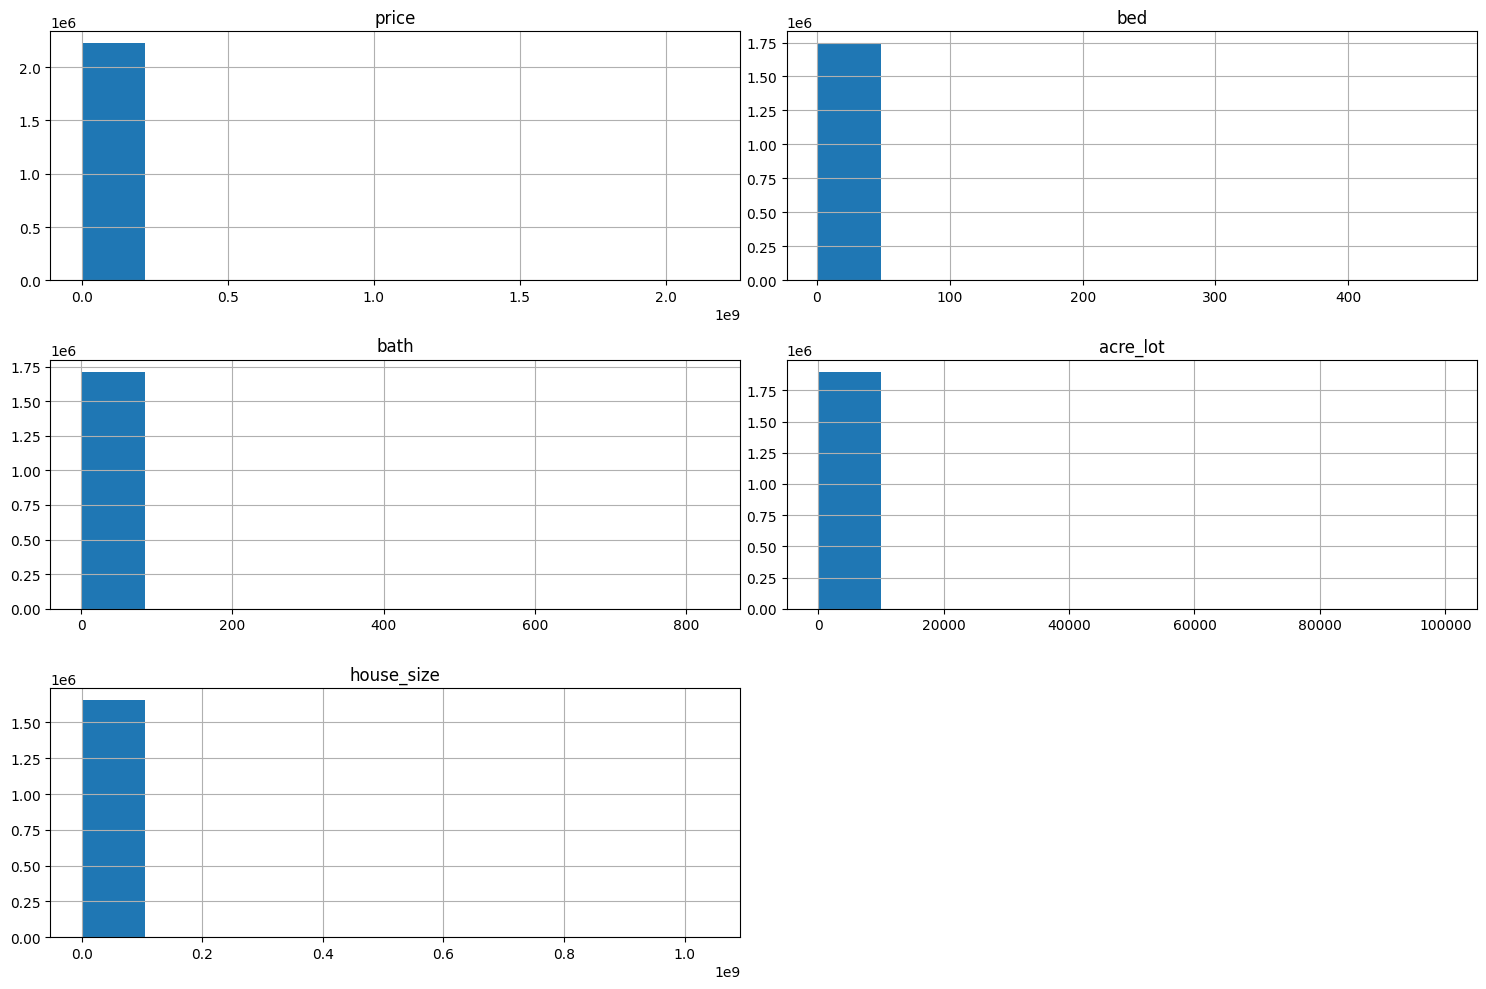

In [5]:
# 4. Categorical Variables
for col in ['brokered_by', 'status', 'street', 'city', 'state']:
    print(f"\nUnique values in {col}:", df[col].nunique())
    print(df[col].value_counts(normalize=True).head())

# 5. Numerical Variables
numerical_cols = ['price', 'bed', 'bath', 'acre_lot', 'house_size']
df[numerical_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

Outliers in price: 171600
Outliers in bed: 118920
Outliers in bath: 79075
Outliers in acre_lot: 292418
Outliers in house_size: 77850


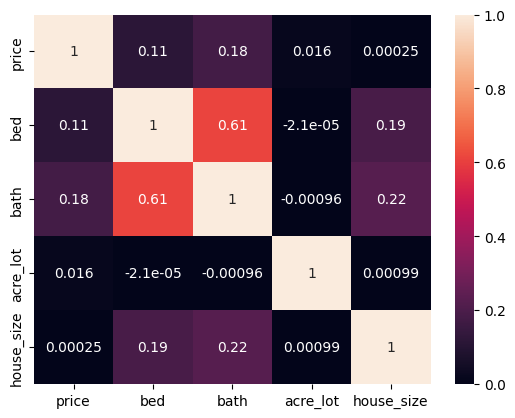

In [8]:
# 6. Outlier Detection
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")

# 7. Correlation Analysis
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True)
plt.show()